In [2]:
using Pkg
Pkg.add("Polynomials")
Pkg.add("QuadGK")
Pkg.add("Plots")
using Polynomials
using QuadGK
using Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %12.9 %>                             ]  25.8 %Fetching: [=============>                           ]  30.1 %>                      ]  42.9 %=======================>                 ]  55.8 %]  68.6 %Fetching: [=============================>           ]  70.8 %>      ]  83.6 %=======================================> ]  96.5 % Resolving package versions...
 Installed WebSockets ─ v1.1.1
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [104b5d7c] ↑ WebSockets v1.1.0 ⇒ v1.1.1
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]

In [3]:
(xp,a)=gauss(Float64,4)

([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

# zad. 1

In [4]:
Polys = []
push!(Polys, Poly([1]))
push!(Polys, Poly([0, 1], :x))
for i=2:10
    value1 = (2*i +-1)/(i)
    polyx = Poly([0, 1], :x)
    polyy = Poly([1])
    pol = value1*polyx*polyy
    value2 = ((i-1)/i)
    newone = (value1*polyx)*Polys[i] - value2*Polys[i-1]
    
    push!(Polys, newone)
end

In [5]:
Polys

11-element Array{Any,1}:
 Poly(1)                                                                                                             
 Poly(x)                                                                                                             
 Poly(-0.5 + 1.5*x^2)                                                                                                
 Poly(-1.5*x + 2.5*x^3)                                                                                              
 Poly(0.375 - 3.75*x^2 + 4.375*x^4)                                                                                  
 Poly(1.8750000000000002*x - 8.75*x^3 + 7.875*x^5)                                                                   
 Poly(-0.3125 + 6.5625*x^2 - 19.687499999999996*x^4 + 14.4375*x^6)                                                   
 Poly(-2.1875*x + 19.6875*x^3 - 43.31249999999999*x^5 + 26.8125*x^7)                                                 
 Poly(0.2734375 - 9.84375*x^2 +

In [6]:
roots_arr = []
for i=3:5
    push!(roots_arr, roots(Polys[i]))
    push!(roots_arr, gauss(Float64,(i-1)))
end

In [7]:
roots_arr
# Odcięte xi n-punktowej kwadratury Gaussa z funkcją ważącą w(x)
#w [a, b] są zerami wielomianu ortogonalnego ϕn(x) dla tego
#samego przedziału i tej samej funkcji ważącej

6-element Array{Any,1}:
 [-0.57735, 0.57735]                                                                   
 ([-0.57735, 0.57735], [1.0, 1.0])                                                     
 [-0.774597, 0.774597, 0.0]                                                            
 ([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556])                          
 [-0.861136, 0.861136, -0.339981, 0.339981]                                            
 ([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

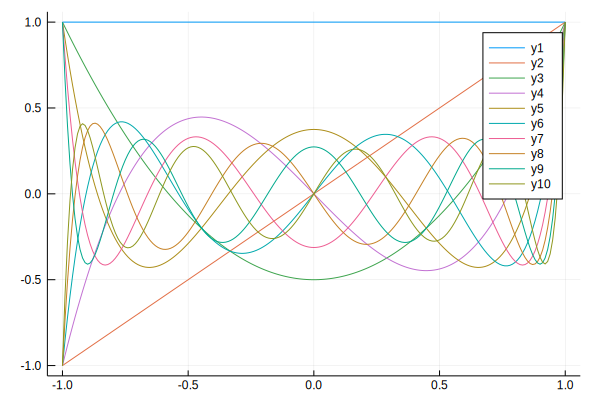

In [8]:
points = [x for x in -1:0.01:1]
points
plot(points, polyval(Polys[1], points))
plot!(points, polyval(Polys[2], points))
plot!(points, polyval(Polys[3], points))
plot!(points, polyval(Polys[4], points))
plot!(points, polyval(Polys[5], points))
plot!(points, polyval(Polys[6], points))
plot!(points, polyval(Polys[7], points))
plot!(points, polyval(Polys[8], points))
plot!(points, polyval(Polys[9], points))
plot!(points, polyval(Polys[10], points))

# zad. 2

In [22]:
#Kwadratura ma stopień dokładności 2n − 1; 
function gauser(k, f)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp))
end
f(x) = x^2
g(x) = x^20
gauser(10, g)

0.09523516964776453

In [27]:
res = []
for i=1:15
    f(x) = x^i
    push!(res, gauser(5, f))
end
res

15-element Array{Any,1}:
 -2.7755575615628914e-17
  0.6666666666666667    
 -2.7755575615628914e-17
  0.4000000000000001    
  0.0                   
  0.2857142857142858    
  1.3877787807814457e-17
  0.22222222222222227   
  0.0                   
  0.17888636936255986   
  0.0                   
  0.14585257971501356   
  0.0                   
  0.11946642920019923   
  0.0                   

# zad. 3

In [10]:
function better(k, f, from, to)
    newz = Poly([(to+from)/2, (to-from)/2])
    newdz = (to-from)/2
    g = f(newz)
    (xp,a)=gauss(Float64,k)
    return newdz*sum(a .* g.(xp))
end

better (generic function with 1 method)

In [17]:
f(x) = x^2
better(2, f, 0, 10)

333.33333333333326

In [11]:
f(x) = x^3
better(2, f, 0, 10)

2499.9999999999995

In [18]:
f(x) = x^4
better(2, f, 0, 10)

19444.444444444445

In [19]:
f(x) = x^5
better(2, f, 0, 10)

152777.77777777778

# zad. 4

In [12]:
f(x) = x^3+10*x
# całka = 1/4 * x^4 + 5 * x^2: 1/4 * 5^4 + 5 * 5^2 - 0 = 1/4 * 625 + 125 = 281,25
quadgk(f, 0, 5)

(281.24999999999994, 5.684341886080802e-14)

In [13]:
f(x) = (1/(sqrt(2*pi)))*exp((-x^2)/2)
quadgk(f, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

# zad. 5 

In [14]:
function moje_trapezy(f, from, to, quantity)
    delta = (to-from)/quantity
    sum = 0
    for i=0:quantity-1
        a = from+i*delta
        b = from+(i+1)*delta
        sum += (f(a) + f(b))*delta/2 
    end
    return sum
end

moje_trapezy (generic function with 1 method)

In [15]:
f(x) = x^2
vals = []
for i=1:50
    push!(vals, moje_trapezy(f, 0, 10, i)-333-1/3)
end

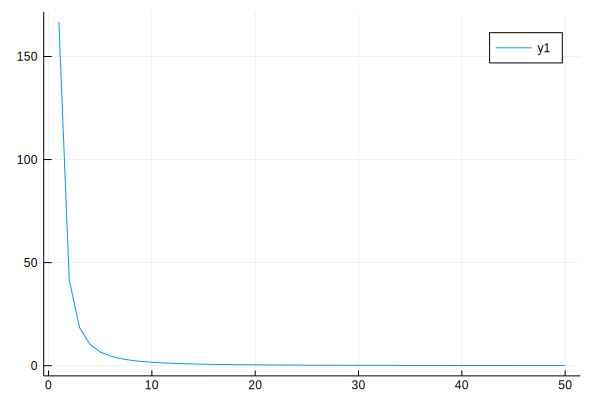

In [16]:
plot(range(1,50), vals)